In [1]:
# 기본 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 모델링용 라이브러리

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

# 기타 라이브러리 
import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 맑은 고딕으로 그래프 한글 지정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df = joblib.load('df.pkl')
df.head()

,총세대수,준공연도,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,...,임대료,임대보증금_대비_임대료_비율,건물형태_계단식,건물형태_복도식,건물형태_혼합식,난방방식_개별,난방방식_중앙,난방방식_지역,지역_비수도권,지역_수도권
0,756,2016,1,902,62104.7498,0,0,0,756,0,...,360990.158730,0.010588,1,0,0,1,0,0,1,0
1,280,2013,1,316,26784.9051,0,0,0,168,0,...,319762.879377,0.012054,1,0,0,1,0,0,1,0
2,528,2018,1,619,42874.5011,0,0,0,528,0,...,185040.000000,0.005625,1,0,0,1,0,0,1,0
3,559,1992,1,307,32190.3600,0,292,267,0,0,...,186414.150268,0.011240,0,1,0,0,0,1,0,1
4,870,1995,1,626,48133.7400,0,870,0,0,0,...,209322.804598,0.012462,0,1,0,0,1,0,0,1


In [4]:
# 실젯값, 예측값 비교 함수
def model_plot(y_test, y_pred):
    plt.figure(figsize=(10, 3))
    plt.plot(y_test.values, label='Actual', linewidth=0.7, marker='o', markersize=2)
    plt.plot(y_pred, label='Predicted', linewidth=0.7, marker='o', markersize=2)
    plt.legend()
    plt.show()

In [5]:
target = '실차량수'
x = df.drop(target, axis = 1)
y = df.loc[:, target]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [7]:
scaler = MinMaxScaler()
# scaler.fit(x_train)
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [8]:
model_result = {}

### 1. KNN

In [9]:
param = {'n_neighbors': range(1, 50)}

model1 = GridSearchCV(KNeighborsRegressor(), 
                     param,                    
                     cv = 5)                     

model1.fit(x_train_scale, y_train)

print('최적파라미터:', model1.best_params_)
print('최고성능:', model1.best_score_)

y_pred = model1.predict(x_test_scale)

model_result['KNN'] = model1.best_score_

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

최적파라미터: {'n_neighbors': 3}
최고성능: 0.5975293540436041
MAE: 149.15151515151516
R2: 0.6816187892737027


### 2. LinearRegression

In [10]:
model2 = LinearRegression()

model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

model_result['LinearRegression'] = r2_score(y_test, y_pred)

print('MAE =',mean_absolute_error(y_test, y_pred))
print('R2 =',r2_score(y_test, y_pred))

MAE = 73.50736175206654
R2 = 0.9318840636876109


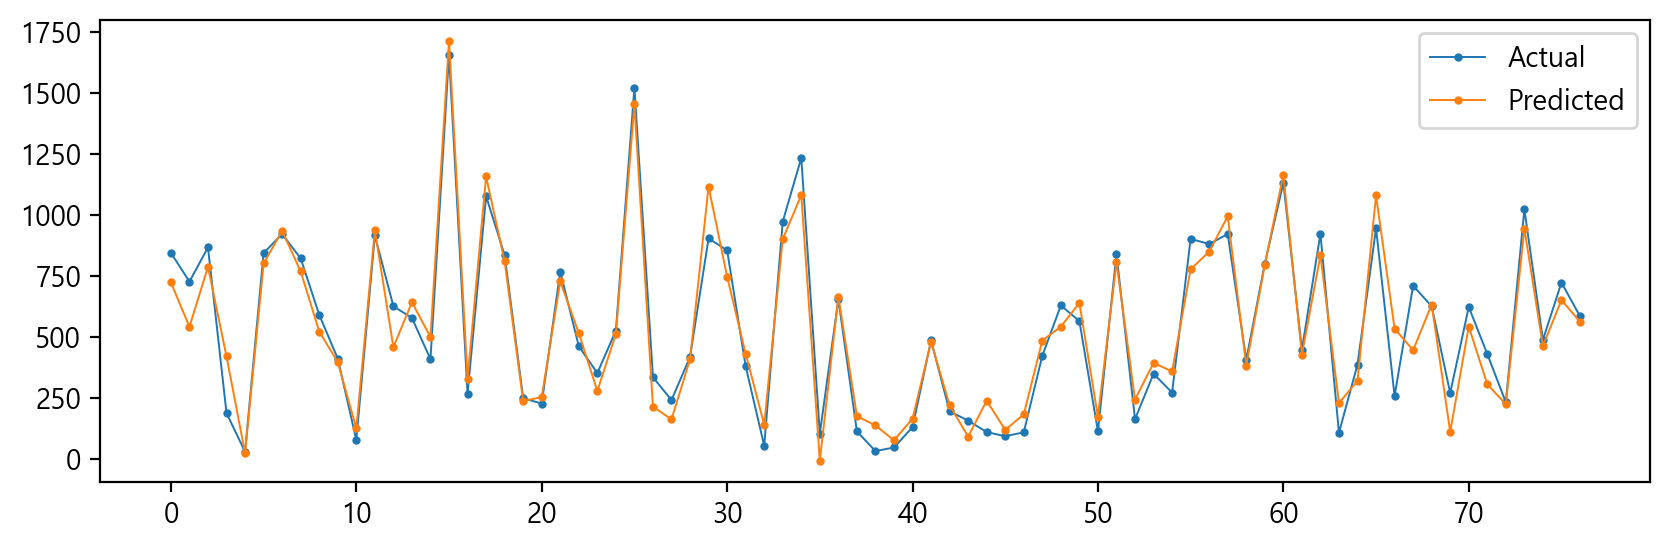

In [11]:
model_plot(y_test, y_pred)

### 3. Decision Tree

In [12]:
param = {'max_depth': range(1, 50)}

model3 = GridSearchCV(DecisionTreeRegressor(), 
                     param,                    
                     cv = 5)                      

model3.fit(x_train, y_train)

print('최적파라미터:', model3.best_params_)
print('최고성능:', model3.best_score_)

y_pred = model3.predict(x_test)

model_result['Decision Tree'] = model3.best_score_

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

최적파라미터: {'max_depth': 3}
최고성능: 0.8063468160150977
MAE: 115.43133230405957
R2: 0.8132236815578162


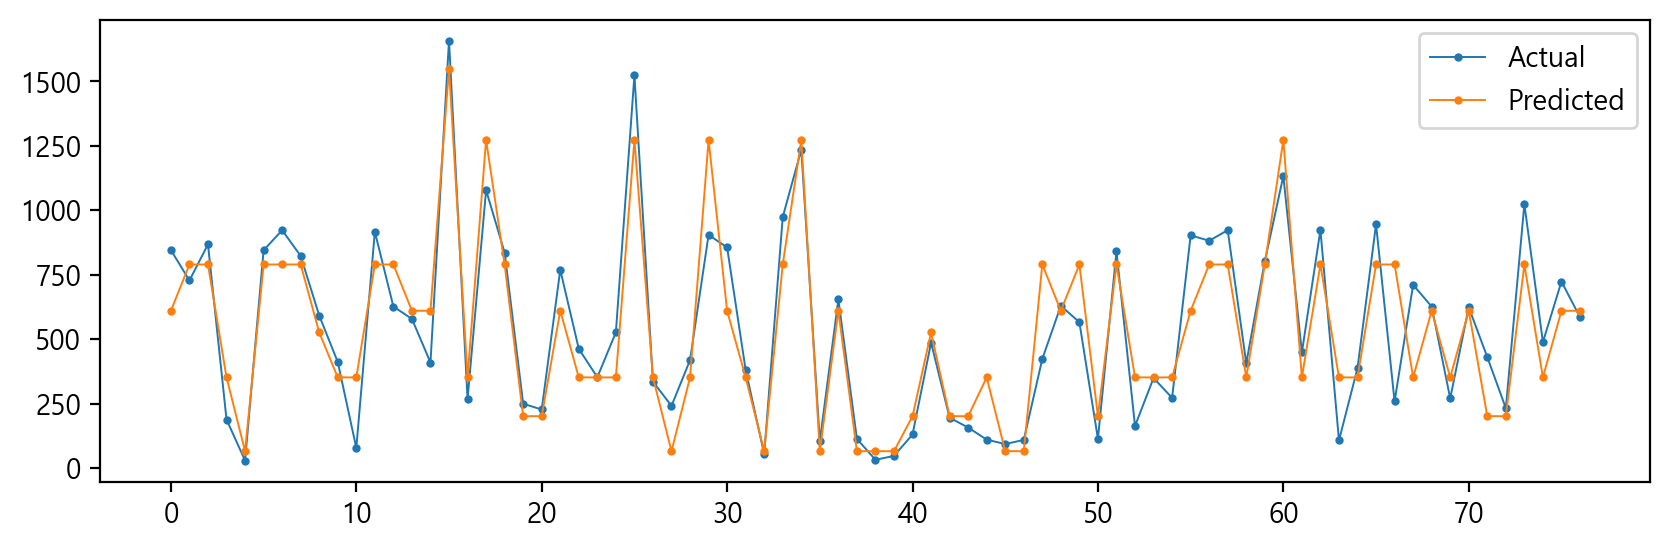

In [13]:
model_plot(y_test, y_pred)

### 4. XGBoost

In [14]:
param = {'max_depth': range(1, 50)}

model4 = GridSearchCV(XGBRegressor(), 
                     param,                  
                     cv = 5)                      

model4.fit(x_train, y_train)

print('최적파라미터:', model4.best_params_)
print('최고성능:', model4.best_score_)

y_pred = model4.predict(x_test)

model_result['XGBoost'] = model4.best_score_

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

최적파라미터: {'max_depth': 2}
최고성능: 0.8086412645525118
MAE: 78.24707521711078
R2: 0.9134911097881442


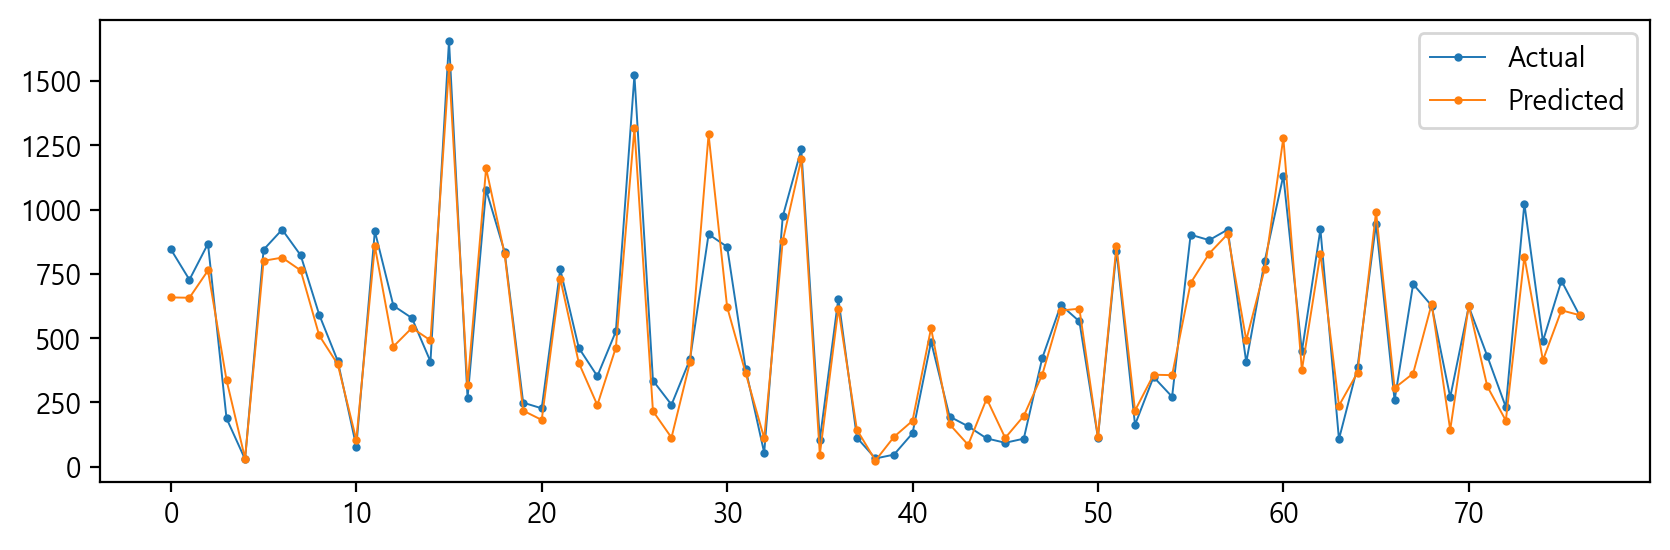

In [15]:
model_plot(y_test, y_pred)

### 5. LightGBM

In [16]:
param = {'max_depth': range(1, 50)}

model5 = GridSearchCV(LGBMRegressor(verbose = -1), 
                     param,                   
                     cv = 5)                     

model5.fit(x_train, y_train)

print('최적파라미터:', model5.best_params_)
print('최고성능:', model5.best_score_)

y_pred = model5.predict(x_test)

model_result['LightGBM'] = model5.best_score_

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

최적파라미터: {'max_depth': 1}
최고성능: 0.7162120174318186
MAE: 91.9879140177614
R2: 0.8678947737111726


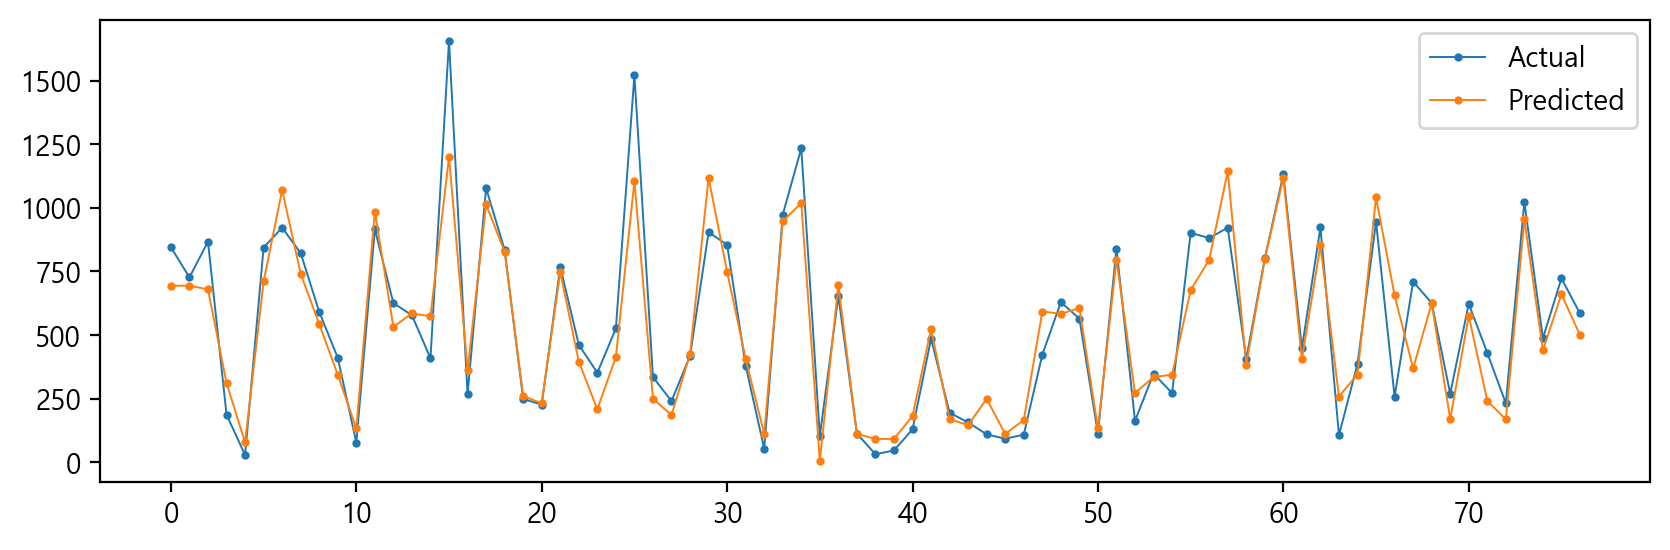

In [17]:
model_plot(y_test, y_pred)

### 성능 비교 

In [18]:
print(model_result)

{'KNN': 0.5975293540436041, 'LinearRegression': 0.9318840636876109, 'Decision Tree': 0.8063468160150977, 'XGBoost': 0.8086412645525118, 'LightGBM': 0.7162120174318186}


<BarContainer object of 5 artists>

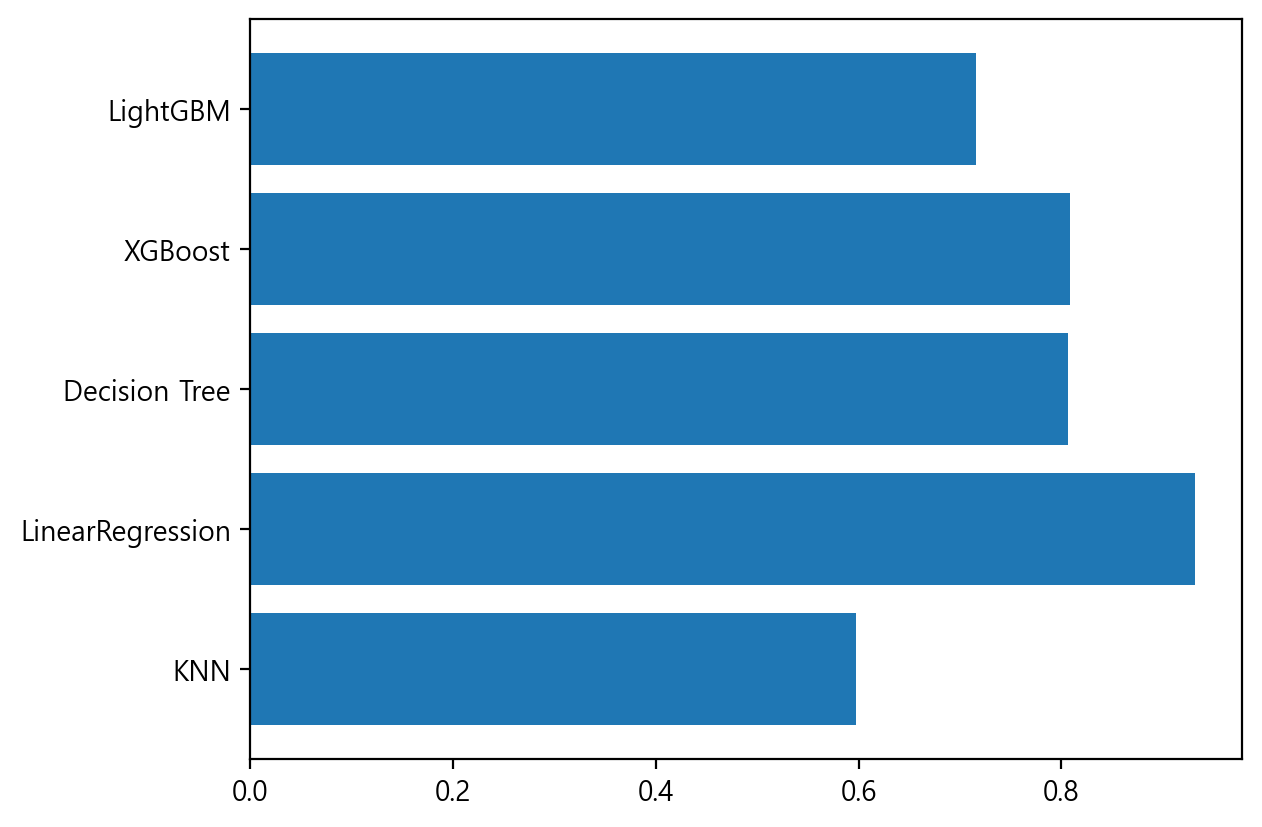

In [19]:
plt.barh(list(model_result), model_result.values())

## 예측

In [20]:
# 파이프라인 만들기
def data_pipeline(data):
    apt01 = data.copy()

    #격측치 처리
    apt01['건물형태'] = apt01['건물형태'].fillna(apt01['건물형태'].mode()[0])
    apt01['난방방식'] = apt01['난방방식'].fillna(apt01['난방방식'].mode()[0])
    apt01['승강기설치여부'] = apt01['승강기설치여부'].fillna(apt01['승강기설치여부'].mode()[0])

    # 변수추가
    apt01['준공연도'] = apt01['준공일자'].astype(str).str[:4].astype(int)
    apt01['총면적'] = (apt01['전용면적'] + apt01['공용면적']) * apt01['전용면적별세대수']

    # 불필요한 변수 제거
    apt01.drop(columns = ['단지명', '단지내주차면수', '준공일자'], inplace = True)

    # 단지 데이터 분리 
    data01 = apt01[['단지코드', '총세대수', '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부']]
    data01 = data01.drop_duplicates()
    data01.reset_index(drop = True, inplace = True)

    # 단지코드별 총면적 합 집계
    data02 = apt01[['단지코드', '총면적', '전용면적별세대수', '전용면적', '공용면적', '임대보증금', '임대료']]
    df_area = data02.groupby('단지코드')['총면적'].sum().reset_index()

    # 전용면적 구간별 집계 (피벗 형태)
    # right=False 오른쪽 값 포함 x
    bins = [10, 30, 40, 50, 60, 70, 80, 200]
    data02['전용면적구간'] = pd.cut(data02['전용면적'], bins=bins, right=False)
    data02.head()
    
    # 단지코드, 전용면적구간별 전용면적별세대수 합을 집계
    temp = data02.groupby(['단지코드', '전용면적구간'])['전용면적별세대수'].sum().reset_index()
    df_pivot = temp.pivot(index='단지코드', columns='전용면적구간', values='전용면적별세대수').reset_index()
    
    # 세대 수에 따라 임대보증금과 임대료가 다를 수 있기 때문에, 단순 평균 대신 세대 수를 고려한 가중 평균
    df_rent_t = data02.groupby(['단지코드','전용면적별세대수'], as_index=False)[['임대보증금','임대료']].mean()
    df_rent_t['임대보증금'] = df_rent_t['임대보증금'] * df_rent_t['전용면적별세대수']
    df_rent_t['임대료'] = df_rent_t['임대료'] * df_rent_t['전용면적별세대수']
    df_rent_t1 = df_rent_t.groupby(['단지코드'], as_index=False)[['임대보증금','임대료']].sum()
    df_rent_t2 = df_rent_t.groupby(['단지코드'], as_index=False)[['전용면적별세대수']].sum()

    df_rent_t = pd.merge(df_rent_t1, df_rent_t2, on='단지코드')
    df_rent_t['임대보증금'] = df_rent_t['임대보증금'] / df_rent_t['전용면적별세대수']
    df_rent_t['임대료'] = df_rent_t['임대료'] / df_rent_t['전용면적별세대수']
    df_rent_t.drop(columns='전용면적별세대수', inplace=True)

    tmp = pd.merge(data01, df_area, on='단지코드', how='left')
    tmp = pd.merge(tmp, df_pivot, on='단지코드', how='left')
    df = pd.merge(tmp, df_rent_t, on='단지코드', how='left')
    
    df.columns = df.columns.astype(str)
    df.rename(columns={
        '[10, 30)': '면적10_30',
        '[30, 40)': '면적30_40',
        '[40, 50)': '면적40_50',
        '[50, 60)': '면적50_60',
        '[60, 70)': '면적60_70',
        '[70, 80)': '면적70_80',
        '[80, 200)': '면적80_200'}, inplace=True)
    
    # 난방방식: 개별, 지역, 중앙 세 가지로 묶기
    df['난방방식'] = df['난방방식'].replace(['개별가스난방', '개별유류난방'], '개별')
    df['난방방식'] = df['난방방식'].replace(['지역가스난방', '지역유류난방', '지역난방'], '지역')
    df['난방방식'] = df['난방방식'].replace(['중앙가스난방', '중앙유류난방', '중앙난방'], '중앙')
    
    # 승강기설치여부: 0, 1 값으로 변경
    df['승강기설치여부'] = df['승강기설치여부'].replace('전체동 설치', 1)
    df['승강기설치여부'] = df['승강기설치여부'].replace(['일부동 설치', '미설치'], 0)
    
    # 단지코드 변수 제거
    df.drop(columns = ['단지코드'], axis = 1, inplace = True)
    
    # 지역 묶기
    mapping = {
    '경기': '수도권',
    '대구경북': '비수도권',
    '광주전남': '비수도권',
    '서울': '수도권',
    '부산울산': '비수도권',
    '대전충남': '비수도권',
    '경남': '비수도권',
    '강원': '비수도권',  
    '전북': '비수도권',
    '충북': '비수도권',
    '제주': '비수도권',
    '세종': '비수도권'  
    }
    df['지역'] = df['지역'].map(mapping)
    
    # 새로운 feature 생성 
    df['임대보증금_대비_임대료_비율'] = np.where(df['임대보증금'] > 0, 
                                    df['임대료'] / df['임대보증금'], 0)
    #가변수화
    df = pd.get_dummies(df, columns=['건물형태', '난방방식', '지역'])
    
    # 1. 임대료가 1 미만인 경우
    condition1 = df['임대료'] < 1
    
    # 2. 임대보증금이 1 미만인 경우
    condition2 = df['임대보증금'] < 1
    
    # 3. 실차량수가 총세대수 * 3보다 큰 경우
    # condition3 = data['실차량수'] > data['총세대수'] * 3
    
    # 4. 임대료가 410,000을 초과하는 경우
    condition4 = df['임대료'] > 410000
    
    # 5. 임대보증금이 50,000,000을 초과하는 경우
    condition5 = df['임대보증금'] > 50000000
    
    # 모든 조건을 결합하여 해당하는 행을 제거
    conditions = condition1 | condition2 |  condition4 | condition5
    df = df.drop(df[conditions].index).reset_index(drop=True)
    
    df.reset_index(drop = True, inplace = True)

    return df

In [21]:
new_data = pd.read_excel('test.xlsx')

new_data.tail()

,단지코드,단지명,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,단지내주차면수,전용면적,공용면적,임대보증금,임대료
99,C0353,대전판암3,768,90,대전충남,19910805,복도식,중앙난방,전체동 설치,142,40.32,16.5100,8848000,122290
100,C0360,하남미사 A26BL,588,98,서울,20160901,NaN,지역난방,NaN,539,51.37,21.5569,183228000,0
101,C0360,하남미사 A26BL,588,186,서울,20160901,NaN,지역난방,NaN,539,51.39,21.5652,183228000,0
102,C0360,하남미사 A26BL,588,102,서울,20160901,NaN,지역난방,NaN,539,59.76,25.0776,215057000,0
103,C0360,하남미사 A26BL,588,202,서울,20160901,NaN,지역난방,NaN,539,59.80,25.0944,215057000,0


In [22]:
data = data_pipeline(new_data)

In [23]:
data.head()

,총세대수,준공연도,승강기설치여부,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,...,임대료,임대보증금_대비_임대료_비율,건물형태_계단식,건물형태_복도식,건물형태_혼합식,난방방식_개별,난방방식_중앙,난방방식_지역,지역_비수도권,지역_수도권
0,571,1998,1,33959.3318,0,268,303,0,0,0,...,209904.115587,0.012867,0,1,0,0,0,1,0,1
1,355,1999,1,21805.1992,0,213,142,0,0,0,...,181358.901408,0.016960,0,1,0,1,0,0,0,1
2,96,2022,1,3785.7792,96,0,0,0,0,0,...,103100.000000,0.007570,0,1,0,0,0,1,1,0
3,1533,2008,1,116220.2419,0,0,0,1533,0,0,...,195515.681670,0.005881,0,0,1,0,0,1,1,0
4,712,2008,1,46839.9983,0,129,583,0,0,0,...,157078.918539,0.006841,0,1,0,1,0,0,1,0


In [24]:
model1 = LinearRegression()

model1.fit(x_train, y_train)

predicted1 = model1.predict(data)

print(predicted1)

[ 420.38011578  204.06050845  182.57285008 1357.08060969  688.53722446
  -69.80559643  617.69014508  556.56576367   29.38499772 1082.30141017
  975.83355171  274.36665084  785.70433457  829.2331869   788.36605832
  916.5836868   282.78579745  133.01412103  987.07270079  263.46448879]


In [25]:
new_data  = new_data[new_data['임대료'] >= 20]
new_data = new_data[new_data['임대료'] <= 410000]
new_data = new_data[new_data['임대보증금'] <= 50000000]
vars = ['단지코드', '단지명', '총세대수', '지역']

result = new_data[vars].copy()
result = result.drop_duplicates()
result.reset_index(drop=True, inplace=True)
result['예상차량수'] = predicted1.round(1).astype(int)
result.head()

,단지코드,단지명,총세대수,지역,예상차량수
0,C0112,운암주공6단지아파트,571,경기,420
1,C0114,가평읍내주공아파트,355,서울,204
2,C1149,부산장안A-1BL,96,부산울산,182
3,C0154,정관신도시휴먼시아1단지,1533,부산울산,1357
4,C0159,율하휴먼시아 7단지,712,대구경북,688


In [26]:
model2 = XGBRegressor(max_depth = 2)

model2.fit(x_train, y_train)

predicted2 = model2.predict(data)

print(predicted2)

[ 460.18552   297.36746    94.200775 1326.7372    548.37665   440.719
  822.2139    621.9715     33.845158 1000.9836    887.50574   290.3466
  784.2519    819.8373    824.2308    925.9596    203.01913    45.130203
  770.2646    163.9903  ]


In [27]:
new_data  = new_data[new_data['임대료'] >= 20]
new_data = new_data[new_data['임대료'] <= 410000]
new_data = new_data[new_data['임대보증금'] <= 50000000]
vars = ['단지코드', '단지명', '총세대수', '지역']

result = new_data[vars].copy()
result = result.drop_duplicates()
result.reset_index(drop=True, inplace=True)
result['예상차량수'] = predicted2.round(1).astype(int)
result.head()

,단지코드,단지명,총세대수,지역,예상차량수
0,C0112,운암주공6단지아파트,571,경기,460
1,C0114,가평읍내주공아파트,355,서울,297
2,C1149,부산장안A-1BL,96,부산울산,94
3,C0154,정관신도시휴먼시아1단지,1533,부산울산,1326
4,C0159,율하휴먼시아 7단지,712,대구경북,548
